# SC42150 - Statistical Signal Processing
## Python Assignment 

#### Team members

- Lars de Vries (5635527):
- Lars van Tol  (5144639):

---

## Introduction

The goal of this assignment is to help you get a more practical understanding of some of the concepts of Statistical Signal Processing. Specifically, you will work with stochastic processes and determine their moments, stationarity and ergodicity properties, and also try to detrend the data.

In order to achieve those objectives, you will use the Python programming language, and specifically the modules numpy, scipy (for numerical processing) and matplotlib (for plotting). In case you are completely unfamiliar with Python, you should learn the basics before attempting this exercise. You are allowed to use numpy's implementations of common routines, such as mean or cov amongst other, but if you do so make sure you have read the documentation and are sure that they accomplish exactly what is taught in the lecture notes, as sometimes there are small differences in definitions and implementations. 

Finally, you are also going to use the Jupyter Notebook file format, which might require installing some dependencies on your system. You can find instructions on installing Jupyter [here](https://jupyter.org/install).

## Reporting

The report of this python exercise consists of this Jupyter Notebook file, with your answers added after each question. Answers will consist of code and/or text (markdown) cells. Please use the already indicated cells and format. You will **also** need to deliver a `PDF` version of this file.

In order to create a PDF version of this file, go to the top left, click on `File` then `Export Notebook As` and Choose `PDF`.
If this feature is not supported by your system, you can also choose `LaTeX`.
Then, you can use your preferred `LaTeX` compiler to create the `PDF`. After generation you PDF report, please double check if all answers/plots are correctly displayed.

Moreover, you will also need to send the `.npy` file with the signals used in this exercise. Don't forget to edit your team member's name and student number above. You will submit one Jupyter notebook per team.

## PART A - Climate Variability Analysis
As climate change continues to be a pressing global issue, understanding patterns in climate data is increasingly vital. In this task, you will analyze time series data representing temperature measurements collected from various geographical locations over time.

You are provided with a dataset in .npy format that contains temperature readings. Each time series represents a different weather station or location. For the purposes of this analysis, we assume that all stations are subject to the same underlying climatic influences but with their own local variations - each time series is considered a different realization of a common stochastic process.

Your goal is to investigate statistical and structural patterns in temperature fluctuations across different locations. This will help you better understand global or regional climate trends, seasonal variation, and potential anomalies.

In this task, you will begin by loading the `.npy` file containing daily temperature data recorded across for 110 unique locations, over first 6 months of 2025 (181 days). Each time series represents one location and contains daily temperature observations.

Perform the following:

### Q1: (5 pts) Load the data
Load the `.npy` file using `np.load()`
This should return a matrix of size \( N x K \), where:
   - \( N \): Number of time steps (daily observations)
   - \( K \): Number of locations (different weather stations)

### Plot the temperature time series for:

   - The **first location** to examine typical behavior at an individual site.
   - The **first 10 locations** in a single figure to visualize broader variability and common trends.

These plots will provide initial insights into seasonal behavior, location-specific variation, and potential noise patterns in the data.


Data shape: 180 time steps, 110 locations


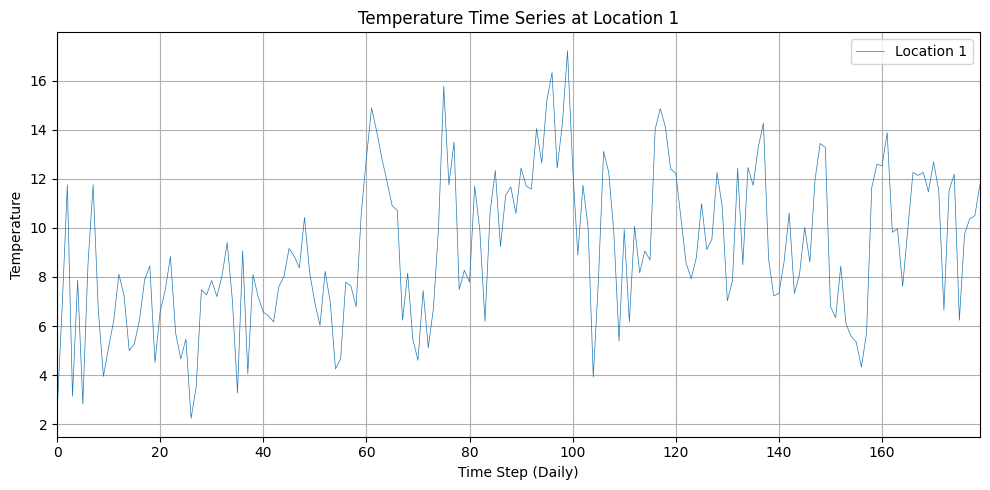

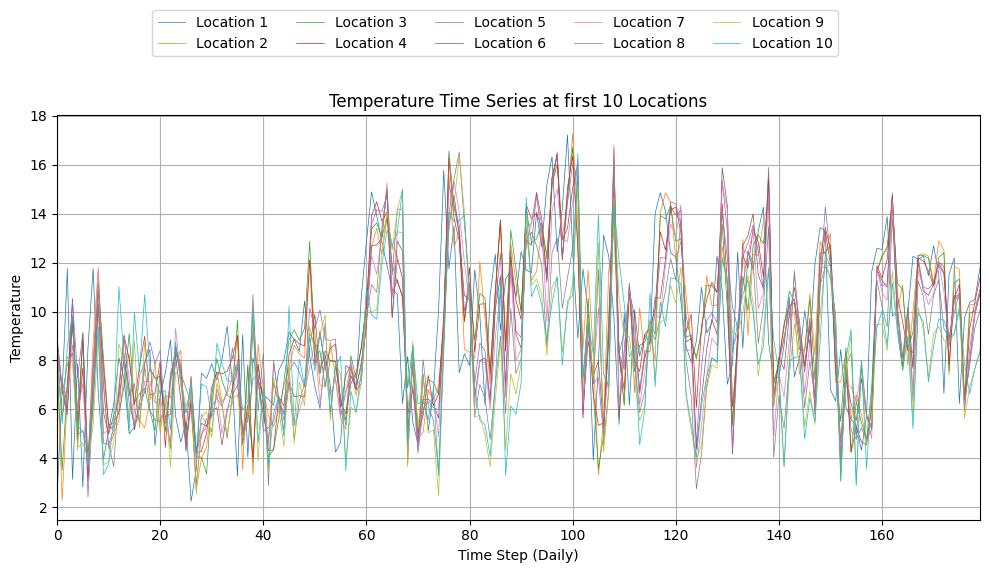

In [15]:

import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.load("temperature_data.npy")  # shape (N, K)
N, K = data.shape
print(f"Data shape: {N} time steps, {K} locations")

# Plot first location's time series
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.arange(N),data[:, 0], label='Location 1', linewidth=0.5)
ax.set_title('Temperature Time Series at Location 1')
ax.set_xlabel('Time Step (Daily)')
ax.set_ylabel('Temperature')
ax.legend()
ax.set_xlim(0, N-1)
ax.grid()
plt.tight_layout()
plt.show()

# Plot the first 10 locations
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for i in range(10):
    ax.plot(np.arange(N),data[:, i], label=f'Location {i+1}', linewidth=0.5)
ax.set_title('Temperature Time Series at first 10 Locations')
ax.set_xlabel('Time Step (Daily)')
ax.set_ylabel('Temperature')
ax.set_xlim(0, N-1)
ax.grid()

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5)
plt.tight_layout()
plt.show()

### Q2: (5 pts) Mean and Standard Deviation
Compute and plot the mean and standard deviation (as region between $\mu - \sigma$ and $\mu + \sigma$) of temperature across all locations at each time step.

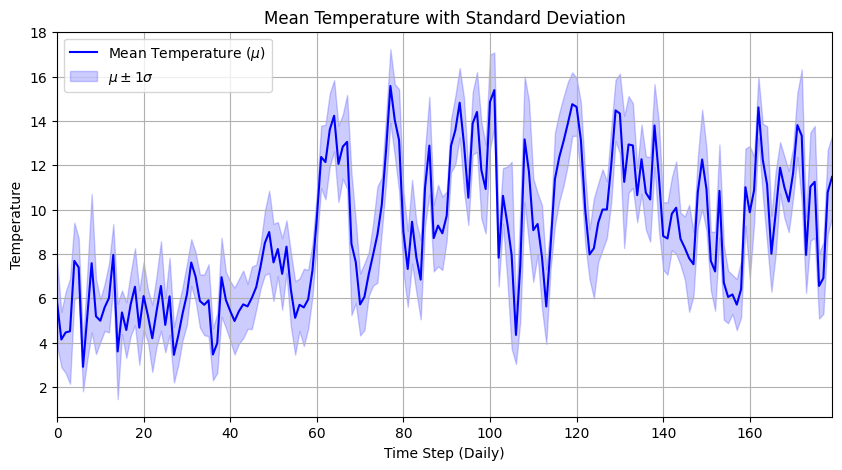

In [16]:
temperature_mean = np.mean(data, axis=1)
temperature_std = np.std(data, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.arange(N), temperature_mean, label='Mean Temperature ($\\mu$)', color='blue')
ax.fill_between(np.arange(N), temperature_mean - temperature_std, temperature_mean + temperature_std, color='blue', alpha=0.2, label='$\\mu \\pm 1 \\sigma$')
ax.set_title('Mean Temperature with Standard Deviation')
ax.set_xlabel('Time Step (Daily)')
ax.set_ylabel('Temperature')
ax.legend()
ax.set_xlim(0, N-1)
ax.grid()
plt.show()

### Q3: (5 pts) Plot the Ensemble Mean and Variance 

Assuming each location’s time series represents an independent realization of the same climate process, compute and plot the ensemble mean and ensemble variance over time. Use these metrics to comment on how the average climate signal behaves and how much variability is present across the spatial domain.

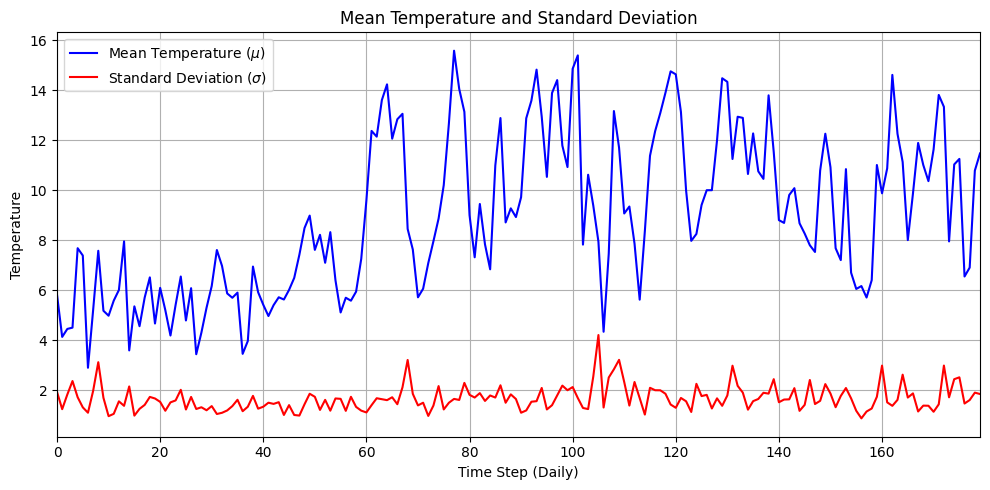

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.arange(N), temperature_mean, label='Mean Temperature ($\\mu$)', color='blue')
ax.plot(np.arange(N), temperature_std, color='red', label='Standard Deviation ($\\sigma$)')
ax.set_title('Mean Temperature and Standard Deviation')
ax.set_xlabel('Time Step (Daily)')
ax.set_ylabel('Temperature')
ax.legend()
ax.set_xlim(0, N-1)
ax.grid()
fig.tight_layout()
plt.show()

> The ensemble mean fluctuates moderately over the period of 180 days. A slight upward trend can be perceived, especially when comparing the mean before and after day 60. This could be explained by a seasonal shift.
The variance remains quite low through most of the period, indicating that in general, temperatures across different weather stations are relatively consistent. However, there are some occasional sharp spikes, which could suggest some sort of localized weather event.

### Q4: (10 pts) Plot the Covariance and Correlation Matrix
Compute the covariance matrix $C_{S}$ and the correlation matrix $R_{S}$ for the process $S_n$ where $S$ is the temperature data for all locations and $n =\{0,1,\ldots,179\}$, and visualize them using the `plt.matshow()` command. What can you deduce from the plots? Is the process $S_{n}$ WSS? Motivate your answer.

**Note:** You are not allowed to use the `np.corrcoef`, `np.corrcoef` and `np.cov()` built-in functions.

In [18]:
S =  data[0:179,0:109]
S.shape

(179, 109)

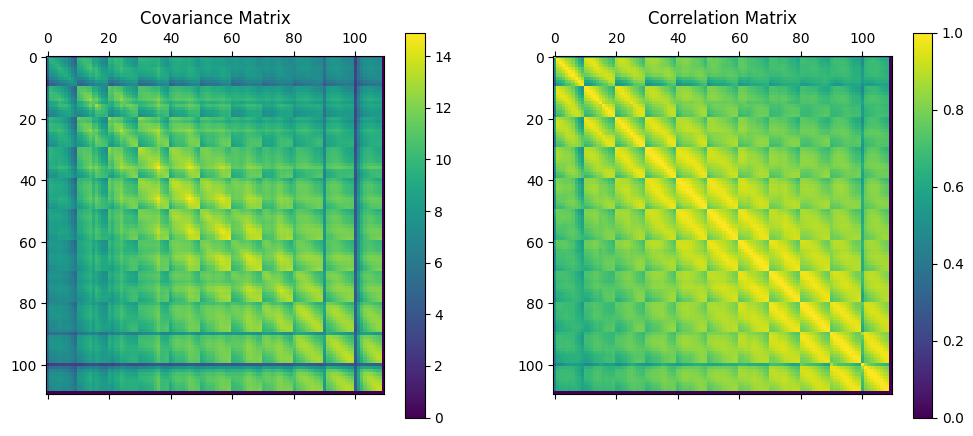

In [19]:
from math import sqrt 

cov_matrix = np.zeros((K, K))
corr_matrix = np.zeros((K, K))

# Calculate means
means = np.mean(S, axis=0)
stds = np.std(S, axis=0)

# zero mean
S_centered = S - means

# Compute covariance
for i in range(K-1):
    for j in range(K-1):
        cov_ij = np.sum(S_centered[:, i] * S_centered[:, j]) / (N - 1)
        cov_matrix[i, j] = cov_ij
        corr_ij = cov_ij / (stds[i] * stds[j])
        corr_matrix[i, j] = corr_ij

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
cov_plot = ax[0].matshow(cov_matrix)
plt.colorbar(cov_plot, ax=ax[0])
ax[0].set_title('Covariance Matrix')

corr_plot = ax[1].matshow(corr_matrix)
plt.colorbar(corr_plot, ax=ax[1])
ax[1].set_title('Correlation Matrix')
plt.show()

> The process is not WSS, as one can clearly see from the figures that the matrices are not constant alond the diagonals. (i.e. they are not Hermitian Toeplitz)

## PART B - Denoising

You have recently gotten involved in amateur RF communication, and you have finally managed to trasnmit a signal wirelessly! Your setup constists of one broadcasting and one receiving antenna. To test out the setup, you sent three short recordings of piano notes. Upon receiving them however, you realise that they have been corrupted by noise. So now you want to apply what you have learned in the Statistical Signal Processing course and try to remove the noise. Since the nature of the interference is stochastic, you want to subtract the effects of the distortion by using the theory of Wiener filters.

In the configuration of the figure below, all signals are discrete-time and real.
The corrupted signal $x(n) = d(n) + v(n)$ contains both the signal of interest $d(n)$ and Gaussian noise $v(n)$ which is _uncorrelated_ with $d(n)$.
In this assignment you will design a FIR filter $W(z)$, such that we can estimate the ground truth signal from $x(n)$ and from the statistical properties of the noise.

![Denoising Scheme](./denoising-scheme.JPG)


### Loading files

As mentioned before, you have three recordings available in the form of `notes_xxx.mat` files, one for each of the tests you ran. Furthermore, you have obtained a recording of the passive noise present in the system (`noise.mat`). Run this section in order to load the `.mat` files with the noise audios and the background noise signals.

This part should be handled after all audio files were uploaded into *data_noised* array and the noise was uploaded into *noise_measured* file.

In [20]:
# packages
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

import scipy.io as sio
import scipy.linalg as lin
import scipy.signal as sig

from IPython.display import Audio

# use this function to play the signals
# be careful when using headphones!
def play_signal( signal ):
    #sd.play( signal.astype('int16'), 22050 )
    sd.play(signal, samplerate=44100)

# notes to be played
notes = np.array( ['Do','Sol','La'] )

# number of experiments
N_exp = notes.shape[0]

print( f'Number of experiments = {N_exp}' )

# list of files for all experiments with audio
filenames = ['notes_do.mat', 'notes_sol.mat', 'notes_la.mat']

# Number of data points
N = len( sio.loadmat( filenames[0] )['audio'][0] )

# create array with received data
data_noised = np.zeros( (N_exp, N), dtype=float )
for iexp in range(N_exp):
    data_noised[iexp] = sio.loadmat( filenames[iexp] )['audio'][0]

# array for the time steps
time_steps = np.linspace( 0, N-1, N ).astype( int )
print( f'Number of recording time steps = {N}' )

# load background noise signal that was measured

filename_noise = 'noise.mat'
data_mat = sio.loadmat( filename_noise )['audio'][0]

Nnoise = len( data_mat )
noise_measured = np.array( data_mat, dtype=float )

print( f'Number of noise time steps = {Nnoise}' )

Number of experiments = 3
Number of recording time steps = 40305
Number of noise time steps = 40305


In [21]:
# listen the noised audio signals

# Bij sd.default.device moet je de juiste device invullen uit de lijst die je krijgt bij:
# print(sd.query_devices())
sd.default.device = 4

ind_to_listen = 2
# play_signal( data_noised[ind_to_listen] )
Audio(data_noised[ind_to_listen], rate=44100)

### Q5: (5 pts) Minimum Variance FIR Wiener Problem 
Formulate the denoising problem as a Minimum Variance FIR Wiener Problem, using the symbols $x(n)$, $v(n)$, $d(n)$, $\hat{d}(n)$, $e(n)$ as in the above figure.
No numerical values are required, but you need to specify the meaning of all the symbols and their relation to the sent and received data.


>$x(n)$: noisy signal
>
>$v(n)$: noise signal
>
>$d(n)$: desired signal
>
>$\hat{d}(n)$: filtered signal
>
>$e(n)$: error signal
>
>We thus define:
>
>$$x(n) = d(n) + v(n)$$
>
>We want to estimate $d(n)$ using a FIR Wiener filter ($W(z)$) which filters $x(n)$ and outputs $\hat{d}(n)$. We thus want to minimize the error between the two ($e(n) = d(n) - \hat{d}(n)$). The output of the filter of order $m$ is:
>
>$$ \hat{d}(n; w(j)) = \sum_{k=0}^{m-1} w(k) x(n-k) = w(0)x(n) + w(1)x(n-1) + ... + w(m-1) x(n-(m-1)) $$
>
>And the problem we need to solve is:
>
>$$ \min_{w(i)} = \mathbb{E} \left [ \left | e(n; w(j)) \right |^{2} \right ]

### Q6: (5 pts) Plot the audio signals
In the same figure, plot the graphs for the received audio signals in the same figure. Repeat this step in a separate figure for the received noise signal. Label your axes and plots clearly.

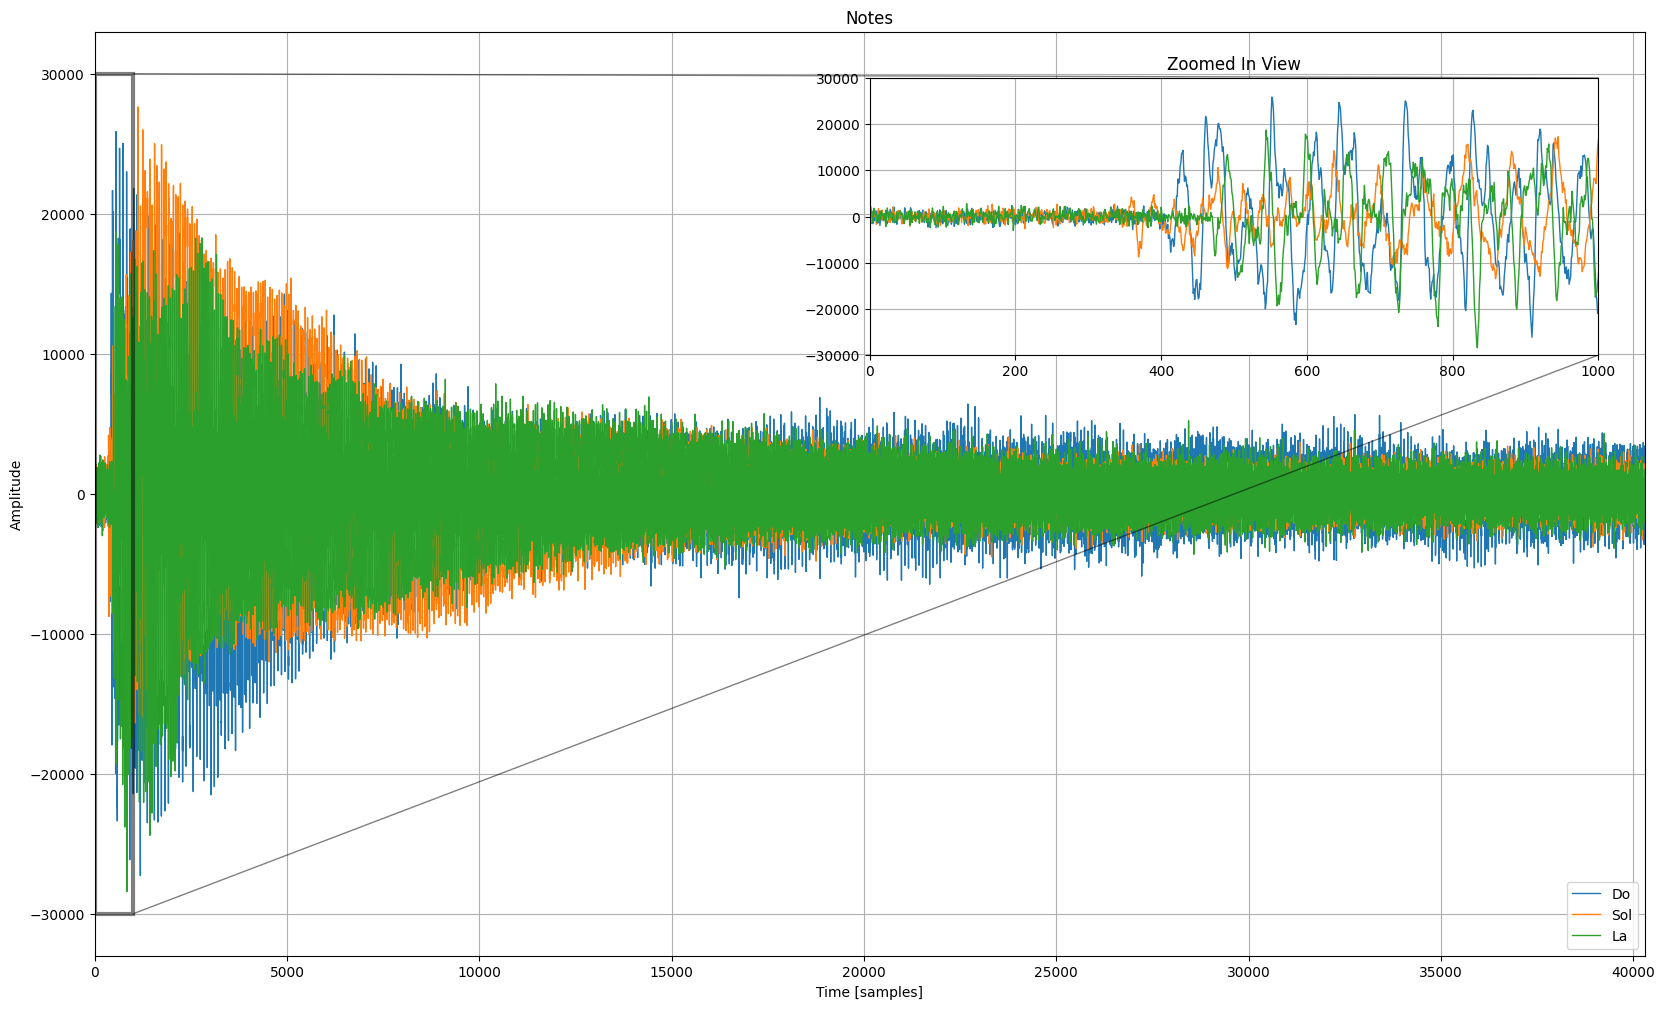

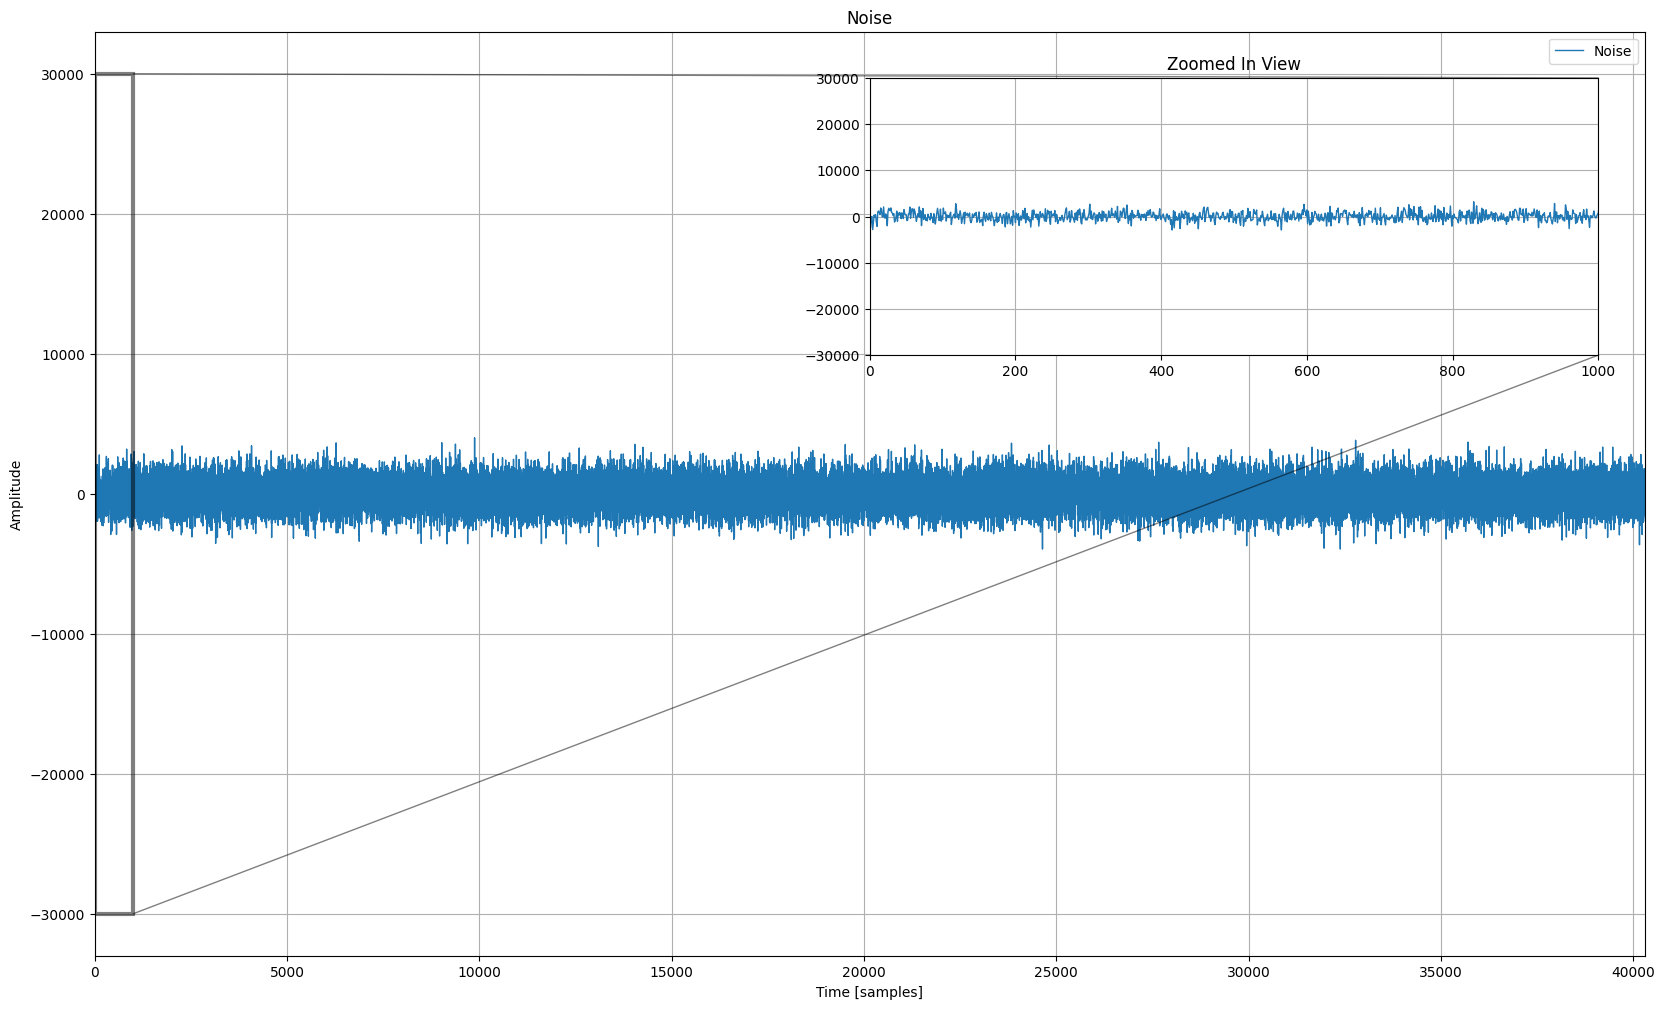

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
ax.set_xlabel("Time [samples]")
ax.set_ylabel("Amplitude")
ax.set_title(f"Notes")
ax.grid()
ax.set_xlim(0, np.max(time_steps))

for i in range(N_exp):
    ax.plot(time_steps, data_noised[i], label=notes[i], lw=1)

x1, x2, y1, y2 = 0, 1000, -30000, 30000  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.65, 0.47, 0.3],
    xlim=(x1, x2), ylim=(y1, y2))
for i in range(N_exp):
    axins.plot(time_steps, data_noised[i], lw=1)
axins.set_title('Zoomed In View')
axins.grid()

ax.indicate_inset_zoom(axins, edgecolor="black", lw=3)

ax.legend()

plt.show()

############################################

fig, ax = plt.subplots(1, 1, figsize=(20, 12))
ax.set_xlabel("Time [samples]")
ax.set_ylabel("Amplitude")
ax.set_title(f"Noise")
ax.grid()
ax.set_xlim(0, np.max(time_steps))

ax.plot(time_steps, noise_measured, label="Noise", lw=1)

x1, x2, y1, y2 = 0, 1000, -30000, 30000  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.65, 0.47, 0.3],
    xlim=(x1, x2), ylim=(y1, y2))
axins.plot(time_steps, noise_measured, lw=1)
axins.set_title('Zoomed In View')
axins.grid()

ax.indicate_inset_zoom(axins, edgecolor="black", lw=3)

ax.legend()

plt.show()

### Q7: (10 pts) Noise Statistics and Auto-correlation Estimation

Use your recorded background noise signal to analyze its statistical properties.

**Tasks:**

1. Compute and print the sample **mean** and **variance** $ \sigma_v^2 $ of the noise.
2. Estimate the **auto-correlation function** of the noise signal for lags $ k = 0 $ to $ 9 $ using time-averaging.
3. Based on your estimated auto-correlation plot, determine whether the noise can reasonably be modeled as **zero-mean white noise (ZMWN)**. Justify your conclusion.


You may assume the noise signal $ \nu(n) $ is **ergodic in autocorrelation**, allowing you to estimate:

$ r_\nu(k) = \frac{1}{N - k} \sum_{n = k + 1}^{N} \nu(n) \nu^*(n - k) $

**Note:**  
- Do **not** use built-in functions like `np.correlate` or `plot_acf`.
- Be careful when assigning arrays—use `.copy()` when needed. See [NumPy documentation](https://numpy.org/doc/stable/reference/generated/numpy.copy.html).


Noise:
	Mean:	5.4e+00
	Var:	1.0e+06


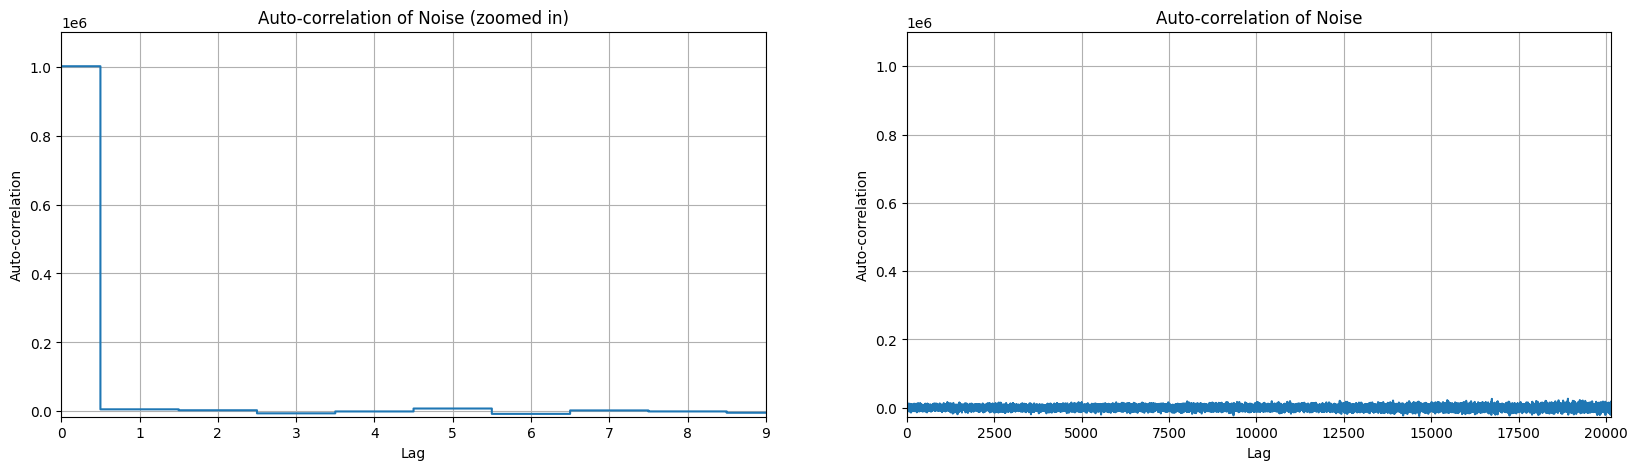

In [23]:
import numpy as np
import matplotlib.pyplot as plt

noise_mean=np.mean(noise_measured)
noise_var=np.var(noise_measured)

# ToDo: Units?

print(f"Noise:")
print(f"\tMean:\t{noise_mean:.1e}")
print(f"\tVar:\t{noise_var:.1e}")

##########################

# Calculating the auto-correlation function for the noise
def auto_correlation(x, lags):
    # r_v(k) = \frac{1}{N-k} \sum_{n=k+1}^{N} v(n) v^*(n-k)
    # \frac{1}{N-k} \sum_{n=k+1}^{N} is mean over N-k samples
    N = len(x)
    r = np.zeros(len(lags), dtype=complex)
    for i, k in enumerate(lags):
        r[i] = np.mean(x[k:] * np.conj(x[:N-k]))

    if np.all(np.isreal(x)):
        r = np.real(r)
    return r

lags = np.arange(0, len(noise_measured)//2)
r_v = np.zeros(len(lags))

###########################

#Plotting the auto-correlation
r_v = auto_correlation(noise_measured, lags)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].set_xlim(0, 9)
ax[0].set_xticks(np.arange(0, 10, 1))
ax[0].set_ylim(np.min(r_v[:1000])*1.1, np.max(r_v[:1000])*1.1)
ax[0].step(lags[:1000], r_v[:1000], where='mid')
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Auto-correlation") # ToDo: Eenheid?
ax[0].set_title(f"Auto-correlation of Noise (zoomed in)")
ax[0].grid()

ax[1].set_xlim(0, np.max(lags))
ax[1].set_ylim(np.min(r_v)*1.1, np.max(r_v)*1.1)
ax[1].step(lags, r_v, where='mid')
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Auto-correlation") # ToDo: Eenheid?
ax[1].set_title(f"Auto-correlation of Noise")
ax[1].grid()

plt.show()

>There are two important characteristics for ZMWN:
>1) Zero mean
>2) $r_v(k) = \sigma_v^2 \delta(k)$
>
>From the previous plot of the received noise and the printed mean of the noise ($5.4$) we see that the mean of the signal is almost $0$ (given the range of the noise). From the auto correlation plots of the noise we see that $r_v(0) \approx \sigma_v^2 = 1.0\cdot10^6$ and that $r_v(k) \approx 0$ if $k \neq 0$. Therefore it is reasonable to assume that the noise is ZMWN.

### Q8: (10 pts)  Determine the Wiener-Hopf equation for the denoising case with filter order $m$.
What assumptions are we making for the audio signal and the noise in order to obtain the values of the filter $w$?
Explain how can we calculate the right hand side of the Wiener-Hopf equation assuming that we know $r_x(k), \; \forall k$ 
and the noise variance $\sigma^2_v$. Make use of mathematical expressions in your explanation.

> We want a weiner filter
>\begin{equation}
>\begin{aligned}
>W(z; w(j)) &= \sum_{j=0}^{m-1} w(j) z^{-j}
>\end{aligned}
>\end{equation}
> It is optimal when the Wiener-Hopf equation is satisfied:
>\begin{equation}
>\begin{aligned}
>\hat{w} &= R_{x}^{-1} r_{dx}
>\end{aligned}
>\end{equation}
>
>We need to calculate $r_{dx}$. We assume that the noise and the desired signal are uncorrelated.
>\begin{equation}
>\begin{aligned}
>r_{dx}(n, n-k)  &= \mathbb{E} \left [ d(n) x^{*}(n-k) \right ] \\
>                &= \mathbb{E} \left [ d(n) d^{*}(n-k) + d(n) v^{*}(n-k) \right ] \\
>                &= \mathbb{E} \left [ d(n) d^{*}(n-k) \right ] + \mathbb{E} \left [ d(n) v^{*}(n-k) \right ] \\
>                &= r_{d}(n, n-k)
>\end{aligned}
>\end{equation}
>
> For the covariance matrix we need the autocorrelation of the noisy signal. We assume that the noise and the desired signal are uncorrelated.
>\begin{equation}
>\begin{aligned}
>r_{x}(n, n-k)   &= \mathbb{E} \left [ x(n) x^{*}(n-k) \right ] \\
>                &= \mathbb{E} \left [ (d(n) + v(n)) (d^{*}(n-k) + v^{*}(n-k)) \right ] \\
>                &= \mathbb{E} \left [ d(n) d^{*}(n-k) \right ] + \mathbb{E} \left [ d(n) v^{*}(n-k) \right ] + \mathbb{E} \left [ v(n) d^{*}(n-k) \right ] + \mathbb{E} \left [ v(n) v^{*}(n-k) \right ]  \\
>                &= r_{d}(n, n-k) + r_{v}(n, n-k)
>\end{aligned}
>\end{equation}
>
> We can express the autocorrelation of the desired signal as:
>\begin{equation}
>\begin{aligned}
>r_{d}(n, n-k) = r_{x}(n, n-k) - r_{v}(n, n-k)
>\end{aligned}
>\end{equation}
>
>So we conclude that
>
>\begin{equation}
>\begin{aligned}
>r_{dx}(n, n-k)  &= r_{x}(n, n-k) - r_{v}(n, n-k)
>\end{aligned}
>\end{equation}

### Q9. (10 pts) Manual Estimation of Auto- and Cross-Correlation Functions

Assume that the received audio signals are **ergodic in autocorrelation**.

**Tasks:**

1. For each received noisy signal $x_i(n)$, compute and **plot its auto-correlation function** $r_{x_i}(k)$ for lags $k = 0$ to $9$ in **separate figures**.  
2. Print the values of $r_{x_i}(k)$ for each signal.

3. Next, compute and **plot the cross-correlation** $r_{d x_i}(k)$ between the corresponding clean signal $d(n)$ and each received signal $x_i(n)$ for lags $k = 0$ to $9$, again in **separate figures**.
4. Print the values of $r_{d x_i}(k)$.

You should reuse your noise estimation results from Question 7 when interpreting these correlations.

**Constraints:**
- Do **not** use built-in correlation functions such as `np.correlate`, `matplotlib.pyplot.xcorr`, or `plot_acf`.
- Implement the summation manually using loops and vector slicing, assuming time-average estimation.


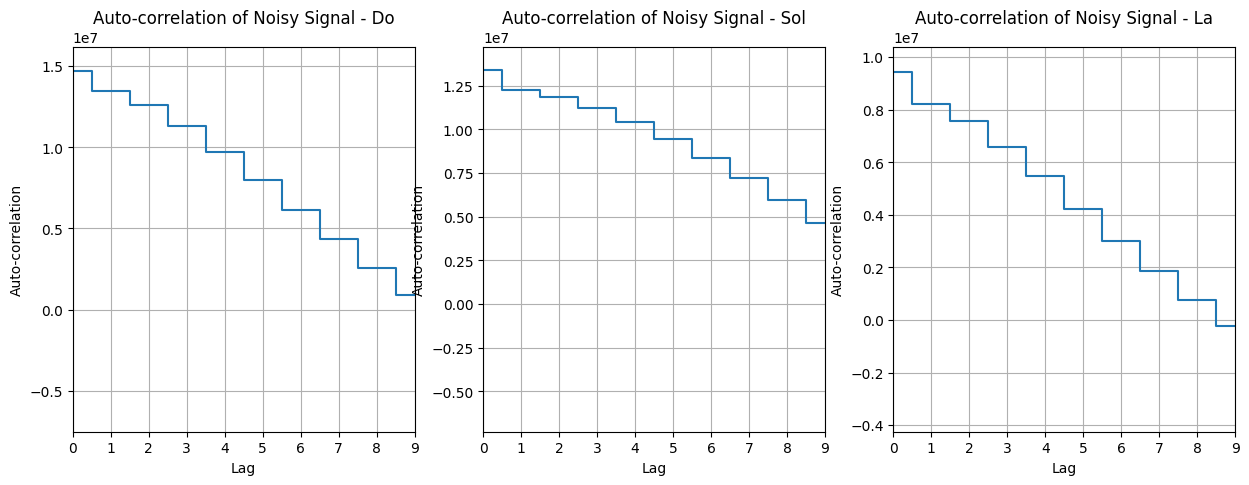


Auto-correlation for Do:

	0: 1.47e+07 	1: 1.34e+07 	2: 1.26e+07 
	3: 1.13e+07 	4: 9.72e+06 	5: 7.96e+06 
	6: 6.15e+06 	7: 4.33e+06 	8: 2.55e+06 
	9: 9.10e+05 

Auto-correlation for Sol:

	0: 1.34e+07 	1: 1.22e+07 	2: 1.18e+07 
	3: 1.12e+07 	4: 1.04e+07 	5: 9.45e+06 
	6: 8.38e+06 	7: 7.20e+06 	8: 5.95e+06 
	9: 4.63e+06 

Auto-correlation for La:

	0: 9.45e+06 	1: 8.21e+06 	2: 7.55e+06 
	3: 6.60e+06 	4: 5.46e+06 	5: 4.22e+06 
	6: 3.01e+06 	7: 1.85e+06 	8: 7.58e+05 
	9: -2.17e+05 


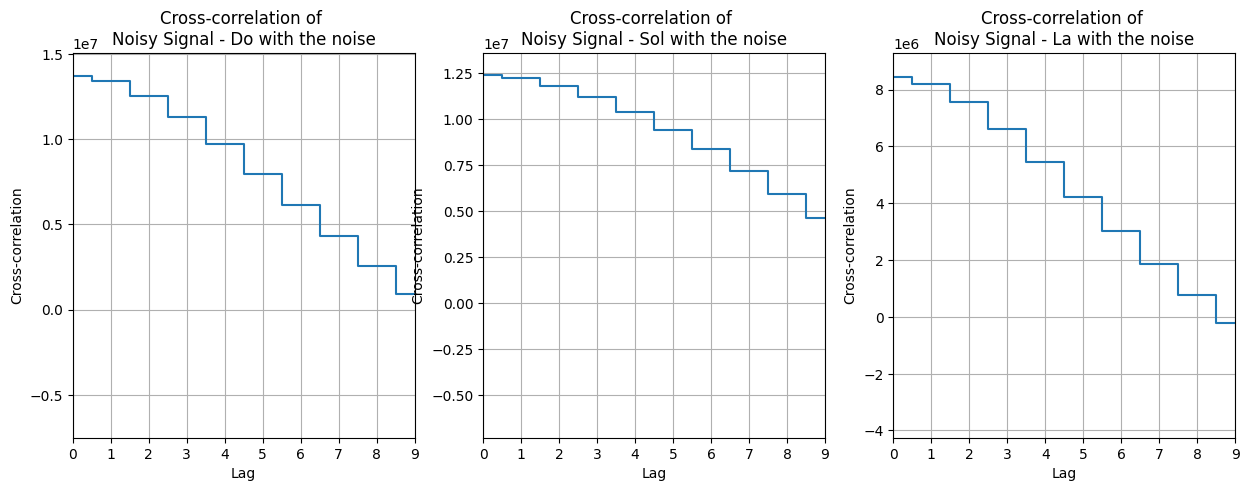


Cross-correlation for Do:

	0: 1.37e+07 	1: 1.34e+07 	2: 1.26e+07 
	3: 1.13e+07 	4: 9.72e+06 	5: 7.96e+06 
	6: 6.15e+06 	7: 4.33e+06 	8: 2.55e+06 
	9: 9.14e+05 

Cross-correlation for Sol:

	0: 1.24e+07 	1: 1.22e+07 	2: 1.18e+07 
	3: 1.12e+07 	4: 1.04e+07 	5: 9.44e+06 
	6: 8.39e+06 	7: 7.20e+06 	8: 5.95e+06 
	9: 4.63e+06 

Cross-correlation for La:

	0: 8.45e+06 	1: 8.21e+06 	2: 7.55e+06 
	3: 6.60e+06 	4: 5.46e+06 	5: 4.22e+06 
	6: 3.02e+06 	7: 1.84e+06 	8: 7.58e+05 
	9: -2.14e+05 


In [24]:
# lags = np.arange(0, 10)

data_auto_corr = [auto_correlation(data_noised[i], lags) for i in range(N_exp)]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(N_exp):
    ax[i].step(lags[:10], data_auto_corr[i][:10], where='mid')
    ax[i].set_xlim(0, 9)
    ax[i].set_xticks(np.arange(0, 10, 1))
    ax[i].set_ylim(np.min(data_auto_corr[i])*1.1, np.max(data_auto_corr[i])*1.1)
    ax[i].set_xlabel("Lag")
    ax[i].set_ylabel("Auto-correlation") # ToDo: Eenheid?
    ax[i].set_title(f"Auto-correlation of Noisy Signal - {notes[i]}")
    ax[i].grid()
plt.show()

#######################

for i in range(N_exp):
    print()
    print(f"Auto-correlation for {notes[i]}:")
    for j, lag in enumerate(lags[:10]):
        if j % 3 == 0:
            print()
        print(f"\t{lag}: { data_auto_corr[i][j]:.2e} ", end="")
    print()


#######################

# r_{dx}  = r_{x} - r_{v}
data_cross_corr = [auto_correlation(data_noised[i], lags) - auto_correlation(noise_measured, lags) for i in range(N_exp)]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(N_exp):
    ax[i].step(lags[:10], data_cross_corr[i][:10], where='mid')
    ax[i].set_xlim(0, 9)
    ax[i].set_xticks(np.arange(0, 10, 1))
    ax[i].set_ylim(np.min(data_cross_corr[i])*1.1, np.max(data_cross_corr[i])*1.1)
    ax[i].set_xlabel("Lag")
    ax[i].set_ylabel("Cross-correlation") # ToDo: Eenheid?
    ax[i].set_title(f"Cross-correlation of \nNoisy Signal - {notes[i]} with the noise")
    ax[i].grid()
plt.show()

########################

for i, note_cross_corr in enumerate(data_cross_corr):
    print()
    print(f"Cross-correlation for {notes[i]}:")
    for j, lag in enumerate(lags[:10]):
        if j % 3 == 0:
            print()
        print(f"\t{lag}: { note_cross_corr[j]:.2e} ", end="")
    print()

### Q10: (10 pts) Denoising the Received Signals Using FIR Wiener Filter

Now that you have computed the optimal FIR Wiener filter coefficients, apply them to each received signal in `data_noised` to obtain an estimate of the clean signals.

**Tasks:**

1. Filter each noisy signal using your Wiener filter (use `scipy.signal.lfilter()` or an equivalent method).
2. For each signal:
   - Plot the **original received signal** and the **denoised output** on the same figure.
   - Use the `play_signal()` function to play both the original and the denoised versions.
3. Listen carefully to the differences and comment on:
   - Whether noise was significantly reduced
   - Whether any part of the desired signal was distorted or lost
   - Any difference in perceived clarity or tone

**Note:**  
Use visual and auditory cues to evaluate the performance of your filter. Make sure to repeat this process for all available test signals in `data_noised`.


In [25]:
m = 10

def denoise(data_noised, data_auto_corr, data_cross_corr, m):
    R_x = lin.toeplitz([data_auto_corr[k] for k in range(0, m)])
    r_dx = np.array([data_cross_corr[k] for k in range(0, m)])
    R_x_inv = lin.inv(R_x)
    w_opt = R_x_inv @ r_dx
    data_filtered = sig.lfilter(w_opt, 1.0, data_noised)
    return data_filtered

denoised_signals = []
for i in range(N_exp):
    data_filtered = denoise(data_noised[i], data_auto_corr[i], data_cross_corr[i], m)
    # Audio(data_filtered, rate=44100)
    denoised_signals.append(data_filtered)

In [26]:
Audio(data_noised[0], rate=44100)

In [27]:
Audio(denoised_signals[0], rate=44100)

In [28]:
Audio(data_noised[1], rate=44100)

In [29]:
Audio(denoised_signals[1], rate=44100)

In [30]:
Audio(data_noised[2], rate=44100)

In [31]:
Audio(denoised_signals[2], rate=44100)

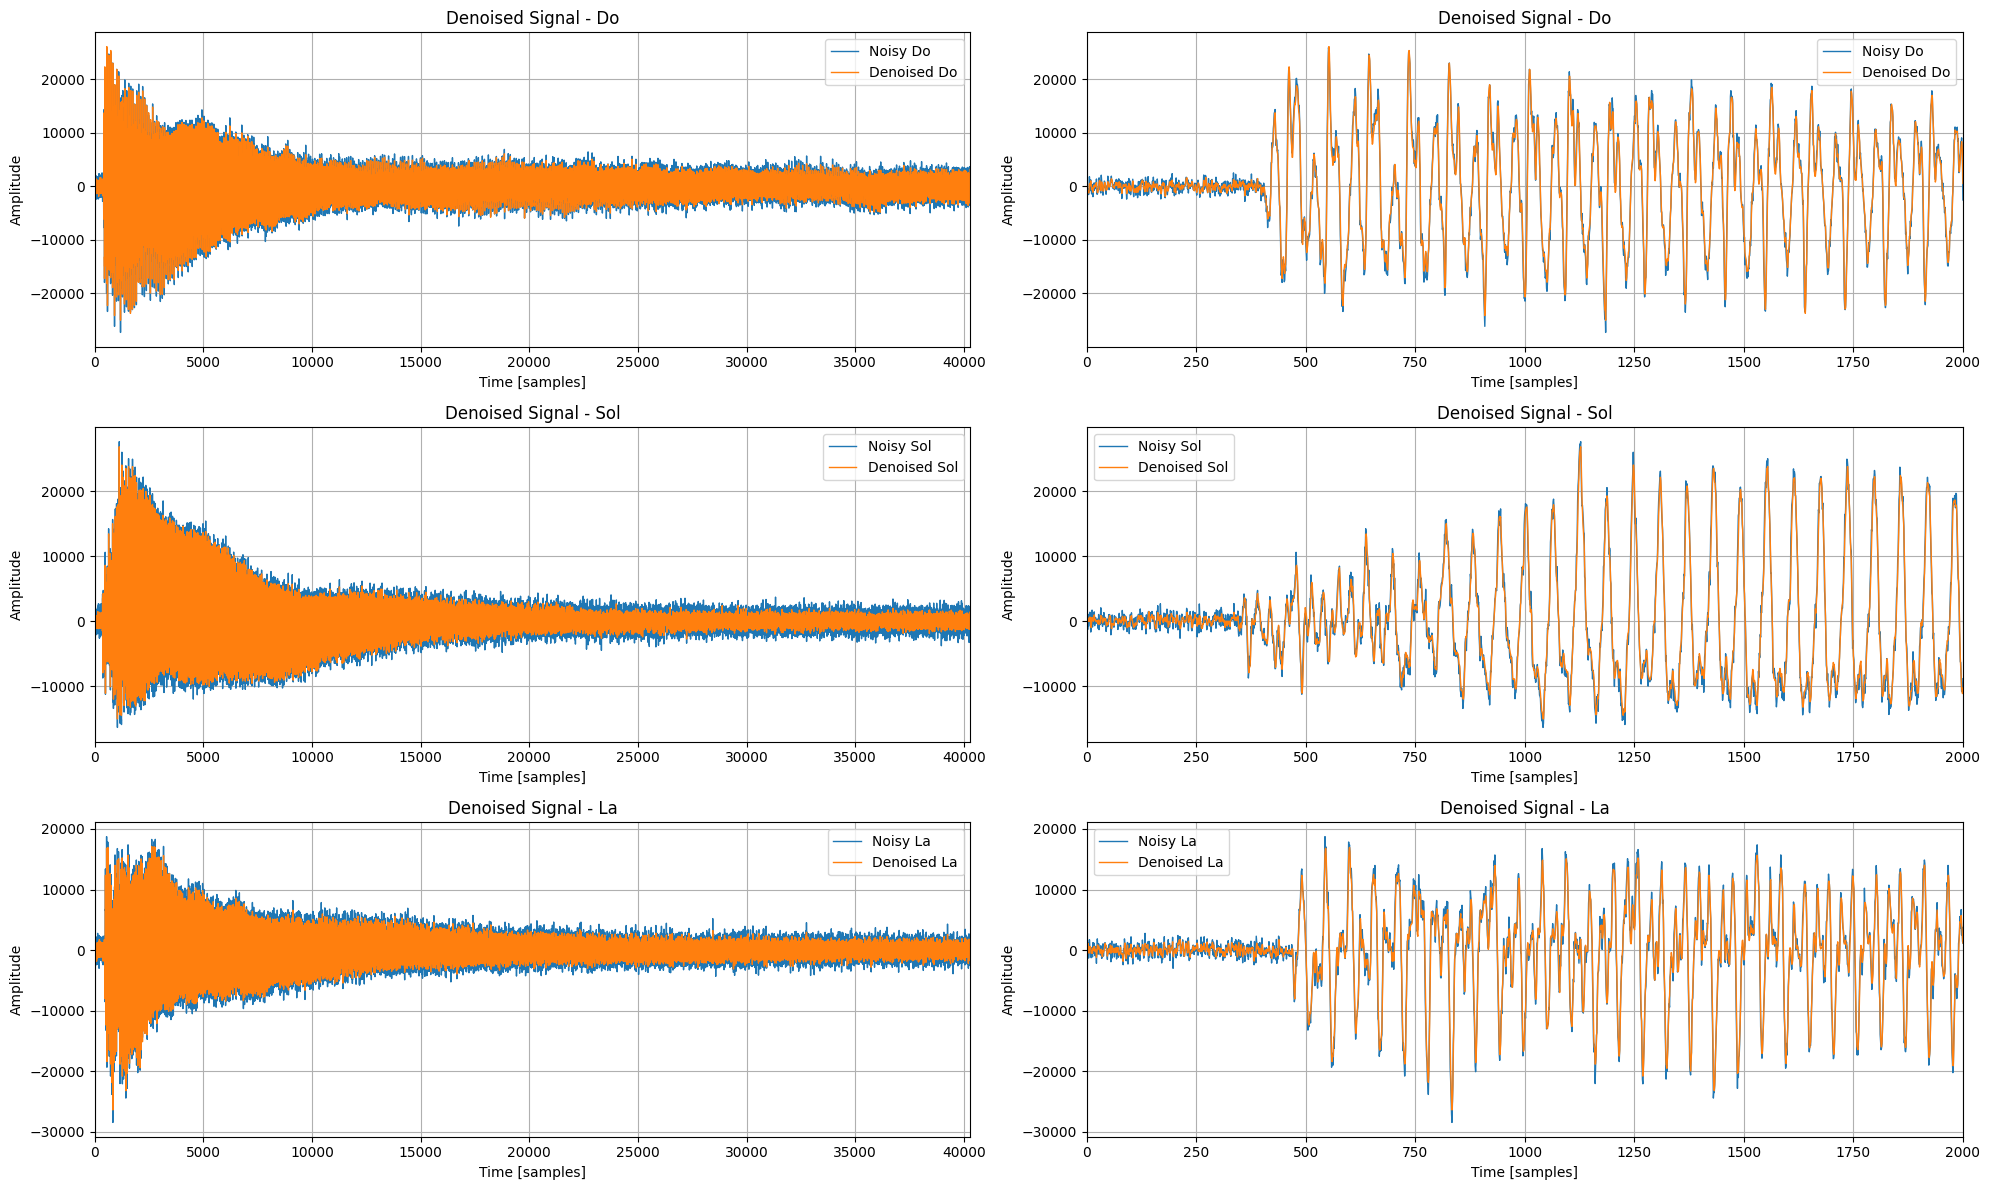

In [32]:
fig, ax = plt.subplots(3, 2, figsize=(20, 12))
for i in range(N_exp):
    ax[i][0].set_xlabel("Time [samples]")
    ax[i][0].set_ylabel("Amplitude")
    ax[i][0].set_title(f"Denoised Signal - {notes[i]}")
    ax[i][0].grid()
    ax[i][0].set_xlim(0, np.max(time_steps))
    ax[i][0].plot(time_steps, data_noised[i], label=f'Noisy {notes[i]}', lw=1)
    ax[i][0].plot(time_steps, denoised_signals[i], label=f'Denoised {notes[i]}', lw=1)
    ax[i][0].legend()

    ax[i][1].set_xlabel("Time [samples]")
    ax[i][1].set_ylabel("Amplitude")
    ax[i][1].set_title(f"Denoised Signal - {notes[i]}")
    ax[i][1].grid()
    ax[i][1].set_xlim(0, 2000)
    ax[i][1].plot(time_steps, data_noised[i], label=f'Noisy {notes[i]}', lw=1)
    ax[i][1].plot(time_steps, denoised_signals[i], label=f'Denoised {notes[i]}', lw=1)
    ax[i][1].legend()

fig.tight_layout()
plt.show()

> The filter achieved a small suppresion of the noise. When hearing the signal, the noise you hear is slightly reduced and the pitch of the noise is lower (which would indicate that high frequencies are surpressed better). From the plots we see that the denoised signal closely follows the noisy signal, but where the amplitudes of the noise signal is smaller in the end of the samples (so where the noise has a relatively large effect) we see that the signal is reduced more.

### Q11: (10 pts) Interpreting the Wiener Filter in the Frequency Domain

To gain insight into how the Wiener filter alters the signal, analyze the power spectra of the original noisy recordings and their corresponding denoised versions.

**Tasks:**

1. For each received signal in `data_noised` and its filtered (denoised) version, compute:
   - $P_x(\omega)$ — the periodogram of the noisy signal
   - $P_{\hat{d}}(\omega)$ — the periodogram of the denoised output

2. For each signal:
   - Create a figure with **two subplots**:
     - The **left subplot** shows the power spectra over the full positive frequency range $[0, \pi]$ rad/sample
     - The **right subplot** zooms into the lower-frequency band, such as $[0, 0.8]$ rad/sample

3. Overlay $P_{\hat{d}}$ on top of $P_x$ in both subplots. Use color transparency or dashed lines to improve readability.

4. Plot the y-axis in **decibels**, i.e., $20 \log_{10} P(\omega)$.

5. Compare the spectral energy of the noisy and denoised signals. Comment on how the Wiener filter appears to affect different frequency bands. 

6. Does the filter attenuate high frequencies more than low ones? Why might that be expected in this application?

**Note:**  
- You may use `scipy.signal.periodogram()` or compute the FFT manually.
- Use `np.fft.fftfreq()` to correctly assign frequency bins when plotting.


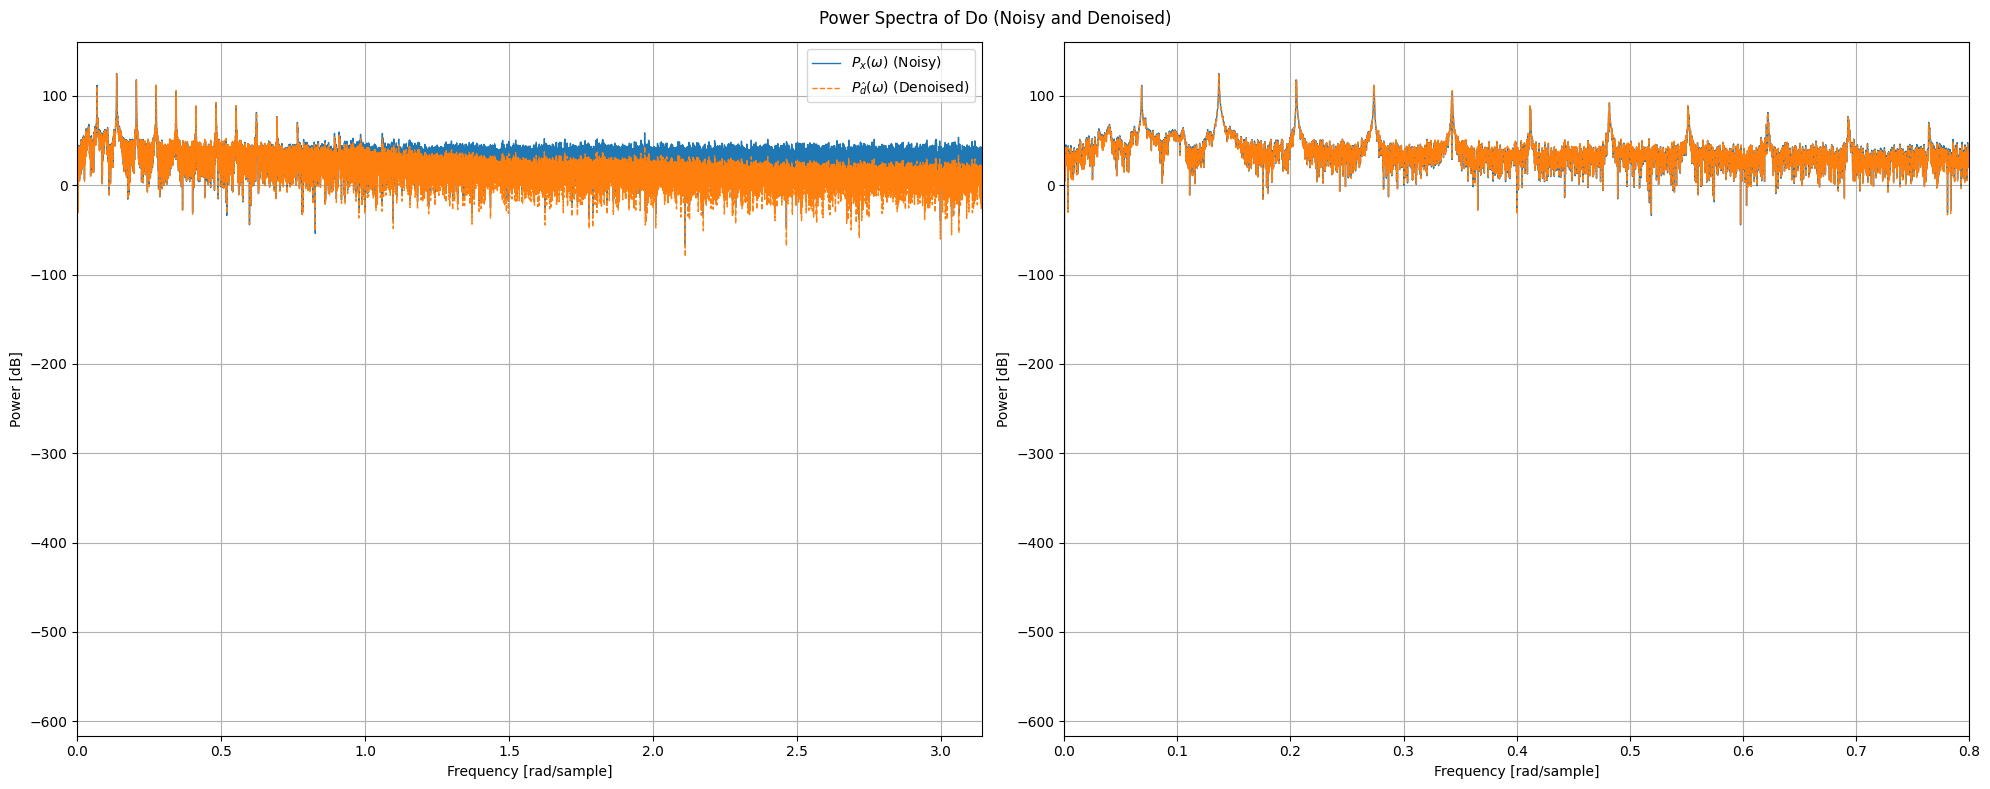

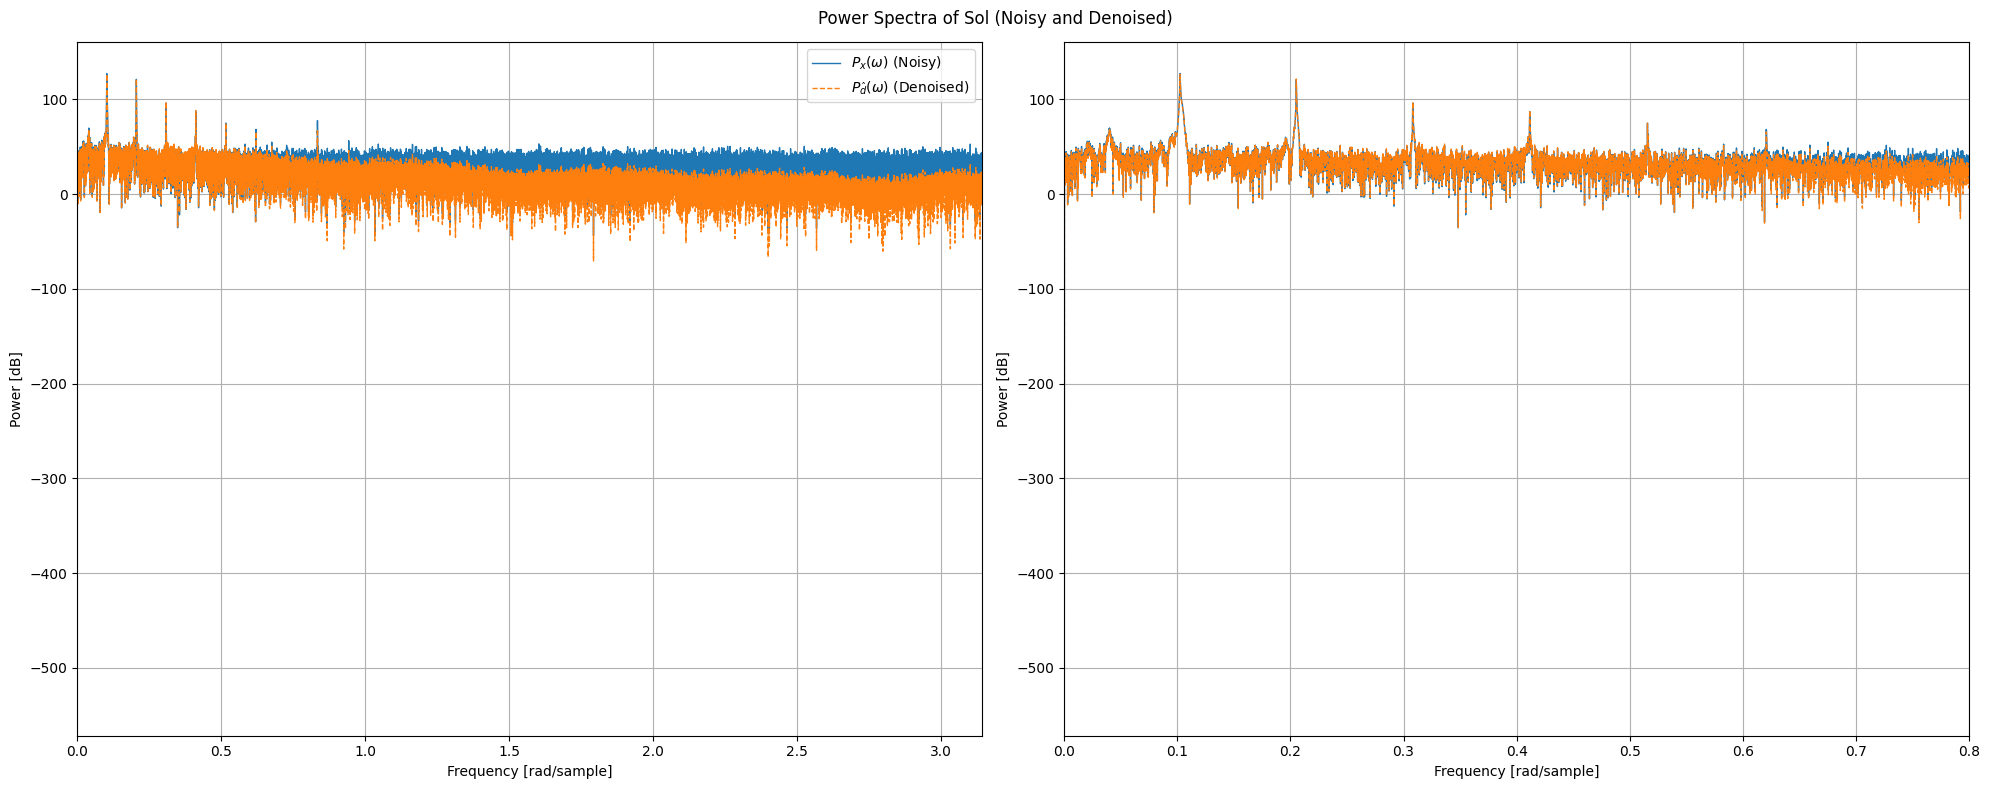

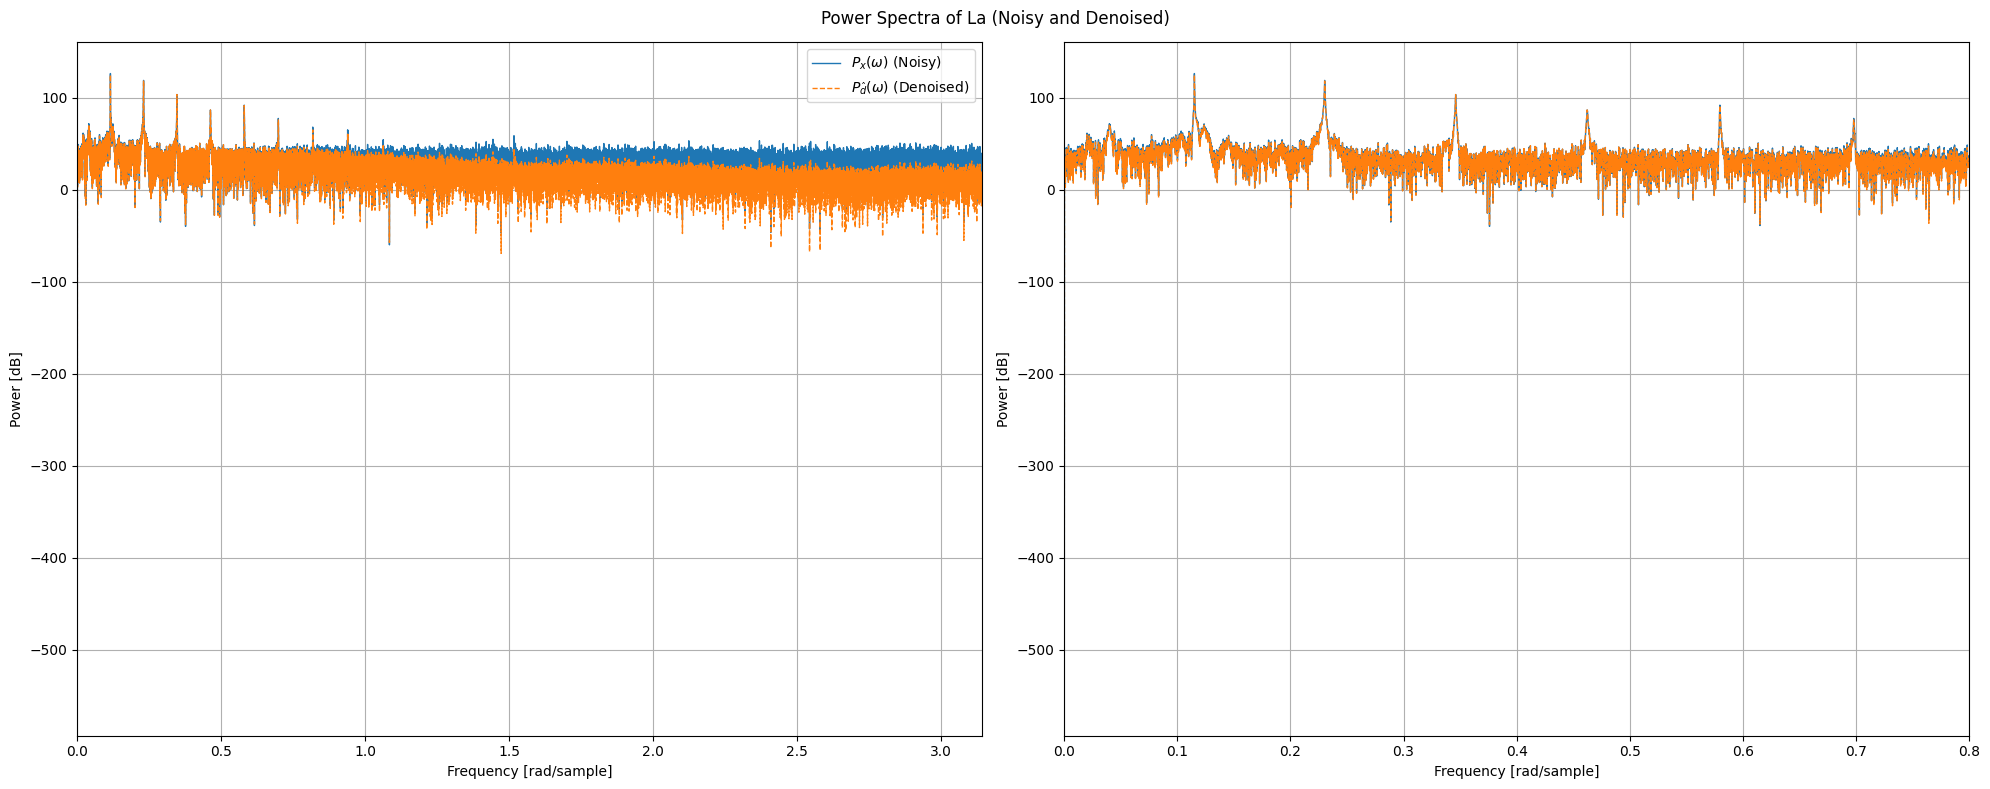

In [33]:

frequencies_noisy_list = []
P_xx_noisy_list = []

frequencies_denoised_list = []
P_xx_denoised_list = []
for i in range(N_exp):
    frequencies, P_xx = sig.periodogram(data_noised[i], fs=44100)
    frequencies_noisy_list.append(frequencies)
    P_xx_noisy_list.append(P_xx)

    frequencies, P_xx = sig.periodogram(denoised_signals[i], fs=44100)
    frequencies_denoised_list.append(frequencies)
    P_xx_denoised_list.append(P_xx)

for i in range(N_exp):
    f_noisy = frequencies_noisy_list[i]
    P_noisy = P_xx_noisy_list[i]
    f_denoised = frequencies_denoised_list[i]
    P_denoised = P_xx_denoised_list[i]

    omega_noisy = 2 * np.pi * f_noisy / 44100
    omega_denoised = 2 * np.pi * f_denoised / 44100

    P_noisy_db = 20 * np.log10(P_noisy)
    P_denoised_db = 20 * np.log10(P_denoised)

    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle(f"Power Spectra of {notes[i]} (Noisy and Denoised)")

    axs[0].plot(omega_noisy, P_noisy_db, label=r'$P_x(\omega)$ (Noisy)', alpha=1, lw=1)
    axs[0].plot(omega_denoised, P_denoised_db, label=r'$P_{\hat{d}}(\omega)$ (Denoised)', linestyle='--', alpha=1, lw=1)
    axs[0].set_xlim([0, np.pi])
    axs[0].set_xlabel('Frequency [rad/sample]')
    axs[0].set_ylabel('Power [dB]')
    axs[0].legend()
    axs[0].grid()

    axs[1].plot(omega_noisy, P_noisy_db, alpha=1, lw=1)
    axs[1].plot(omega_denoised, P_denoised_db, linestyle='--', alpha=1, lw=1)
    axs[1].set_xlim([0, 0.8])
    axs[1].set_xlabel('Frequency [rad/sample]')
    axs[1].set_ylabel('Power [dB]')
    axs[1].grid()

    plt.tight_layout()
    plt.show()


> The better surpression of the higher frequencies as described in the previous question is shown here clearly. We see that the denoised power spectra for the lower frequencies overlaps almost completely with the noisy signal, but the higher the frequencies become, the more we see that the energy in these frequencies is lower compared to the noisy recording. It is expected that the filter does this, when considering the underlying signal $d(n)$. There are clear peaks in the power spectrum that correspond to the note that was recorded. These are mostly in the lower frequencies, we therefore do not want the filter to surpress these. In the higher region where most of the energy in the signal $x(n)$ comes from the noise, we expect the filter to filter out more since it is not from the desired signal.

### Q12: (15 pts) Evaluating Filter Order for Audio Denoising Using RMSE

You want to enhance the quality of your audio denoising by studying how the **FIR Wiener filter order** impacts performance.

To do this, focus on a single piano note audio sample from the dataset. Vary the filter order $M$ from **2 to 500**, and evaluate the filter performance for each order using the **log Root-Mean-Square Error (RMSE)**:

$$
J(M) = \log\left( \sqrt{\mathbb{E}\left[\,|e(n; M)|^2\,\right]} \right)
$$

Where:
- $M$ is the filter order
- $e(n; M)$ is the error between the denoised output and the original clean signal for a given filter order $M$


#### **Tasks:**

1. For each $M \in [60, 200]$, compute and store the RMSE between the filtered and clean signals.
2. Plot the **log-RMSE** $J(M)$ versus filter order $M$.
3. Determine the filter order beyond which increasing $M$ no longer leads to significant improvement (i.e., a plateau in RMSE).
4. Choose an appropriate filter order based on this analysis and plot the denoised signal alongside the original noisy signal. Play the denoised audio.
5. Compare the denoised signal from your chosen filter order to one produced using a **10th-order filter**. Is the result **perceptually better**? Is the added complexity of a higher-order filter **justified** by the improvement?


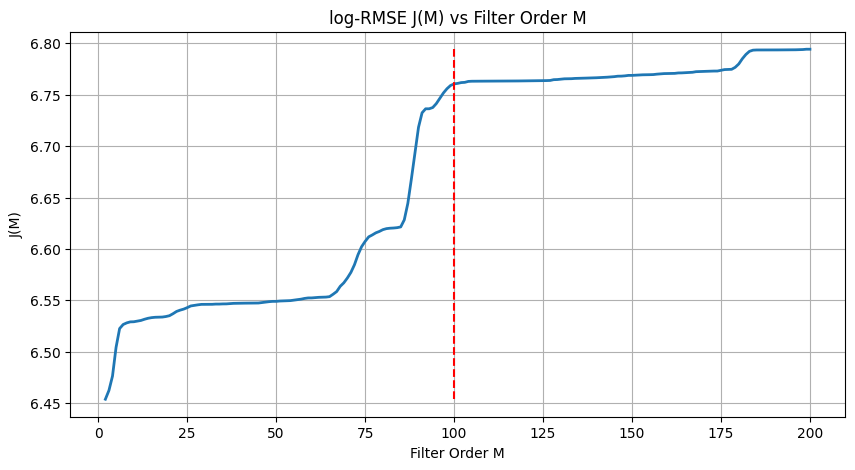

In [37]:
def J(m):
    # J(M) = \log\left( \sqrt{\mathbb{E}\left[\,|e(n; M)|^2\,\right]} \right)
    # e = d - d_hat
    denoised_signals = denoise(data_noised[0], data_auto_corr[0], data_cross_corr[0], m)
    error_signal = data_noised[0] - denoised_signals
    return np.log(np.sqrt(np.mean(np.square(error_signal))))

J_values = []
for m in range(2,201):
    J_values.append(J(m))



plt.figure(figsize=(10, 5))
plt.plot(range(2,201), J_values, lw=2, label='J(M)')
plt.vlines(100, np.min(J_values), np.max(J_values), color='red', linestyle='--', label='M=100')
plt.xlabel('Filter Order M')
plt.ylabel('J(M)')
plt.title('log-RMSE J(M) vs Filter Order M')
plt.grid()
plt.show()

In [47]:
m_optimal = 100

optimal_denoised_signal = denoise(data_noised[0], data_auto_corr[0], data_cross_corr[0], m_optimal)

In [48]:
# Original noisy signal
Audio(data_noised[0], rate=44100)

In [49]:
# Denoised signal filter of order m=10
Audio(denoised_signals[0], rate=44100)

In [50]:
# Denoised signal with optimal m=m_optimal
Audio(optimal_denoised_signal, rate=44100)

> It is audible that the noise is surpressed somewhat more, but not to a great extend. The added complexity is probably not worth it. Where the $R_{x}$ was previously $10\times 10$, it is now $100 \times 100$. The amount of entries is thus 100 times more than before. This makes the problem more complex as this whole matrix has to be inverted.